<a href="https://colab.research.google.com/github/alessiobocco/Diplo_Eco/blob/main/Analisis_Exploratorio_mb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estructura** de Informe (7 pág máx - todo dentro de las 7 con graficos, etc.):
escueto,intro, resultados por bullets.
Teenr en cuenta los puntos solicitados en el informe.
1. Exploración de datos, visualización.(lo importante)
2. Limpieza de datos (Decisiones tomadas al respecto - eliminar outliers, crear nuevas variables, eliminar registros, descarte de columnas, reemplazo o eliminación de nulos, etc)
3. Como encaramos el problema y como se prepararon los datos para resolver el problema.
4. Que modelo aplicamos (en el script quedan los pasos intermedios, pero solo agregar el final,se puede comentar los pasos)
5. Resultados y conclusiones.

# Analisis exploratorio

In [1]:
# Paquetes requeridos
!pip install geopy
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 33.7 MB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 


In [2]:
# Modulos generales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import os.path
import geopandas
import folium


# helpful character encoding module
import chardet

%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/alessiobocco/Diplo_Eco/main/data/precio_locales_CABA.csv", encoding = 'utf-8')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3711 non-null   int64  
 1   antig              3711 non-null   int64  
 2   m2total            3711 non-null   int64  
 3   m2cub              3711 non-null   int64  
 4   ambientes          3711 non-null   int64  
 5   banios             3711 non-null   int64  
 6   direccion          3707 non-null   object 
 7   barrio             3711 non-null   object 
 8   comuna             3711 non-null   int64  
 9   latitud            3711 non-null   float64
 10  longitud           3711 non-null   float64
 11  precioUSD          3711 non-null   int64  
 12  m2precioUSD        3711 non-null   float64
 13  comisaria_dista    3711 non-null   float64
 14  obelisco_dista     3711 non-null   float64
 15  nrobos             3711 non-null   int64  
 16  sup_espacio_verde  3711 

Se trabaja con un data set de 19 variables, se observa que la base a utilizar no posee gran cantidad de datos nulos. Las variables están bien catalogadas como float, int y object respetando la naturaleza de las variables.


### Análisis univariado

#### Antiguedad

Text(0.5, 1.0, 'Boxplot')

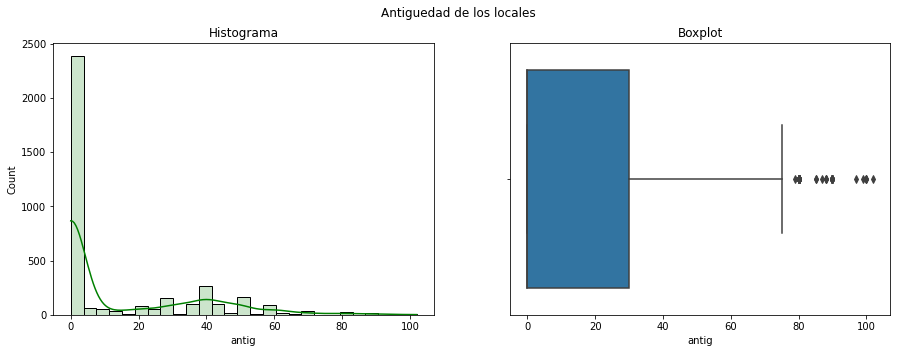

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Antiguedad de los locales')

# Histograma
sns.histplot(ax=axes[0], x = data['antig'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['antig'])
axes[1].set_title("Boxplot")


   index  value
0      1   2318
1      0   1393


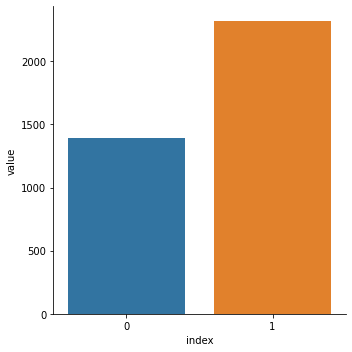

In [6]:
data['antig'].nunique()
estrenar = []
for i in data["antig"]:
  if i == 0:
    estrenar.append(1)
  else:
    estrenar.append(0)

#Se agrega variable Aestrenar al data frame
data["aestrenar"] = estrenar

#Se grafica la nueva variable
plot= data.aestrenar.value_counts().to_frame("value").reset_index()
print(plot)
sns.catplot(data=plot, x="index", y="value", kind="bar")

In [7]:
data_0 = data.drop("antig", axis=1)
data_0

id  m2total  m2cub  ...  count_gastronomia  count_culturales aestrenar
0        1      200    200  ...                 12                 0         1
1        2       50     50  ...                  3                 0         0
2        3      414    414  ...                  5                 0         0
3        4      414    414  ...                  5                 0         0
4        5      285    285  ...                  5                 0         0
...    ...      ...    ...  ...                ...               ...       ...
3706  3707       92     92  ...                 11                 0         1
3707  3708       24     24  ...                  5                 0         1
3708  3709       77     77  ...                 16                 1         1
3709  3710       71     71  ...                  6                 0         1
3710  3711      500    500  ...                  7                 0         1

[3711 rows x 19 columns]

De la variable "antig" se generó una nueva variable "Aestrenar" donde los locales comerciales a esternar adquieren el valor 1 y el resto de locales el valor 0. Se observa una mayor cantidad de locales comerciales a estrenar (2318) que locales usados (1393). Se elimina la variable "antig" del dataset.

#### Superficie total

Text(0.5, 1.0, 'Boxplot')

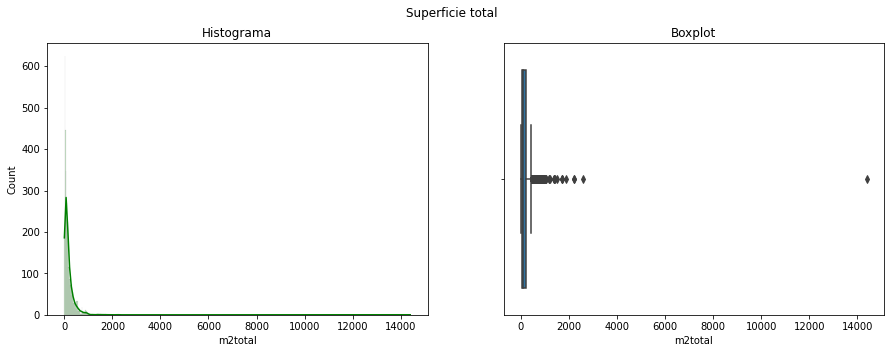

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie total')

# Histograma
sns.histplot(ax=axes[0], x = data['m2total'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2total'])
axes[1].set_title("Boxplot")

In [9]:
#identificamos el outlier
shopping = data[data.m2total >= (14000)]
shopping

id  antig  m2total  ...  count_gastronomia  count_culturales  aestrenar
1928  1929      0    14400  ...                  4                 5          1

[1 rows x 20 columns]

In [10]:
#creamos un nuevo df para trabajar y demás
data_1 = data_0
data_1

id  m2total  m2cub  ...  count_gastronomia  count_culturales aestrenar
0        1      200    200  ...                 12                 0         1
1        2       50     50  ...                  3                 0         0
2        3      414    414  ...                  5                 0         0
3        4      414    414  ...                  5                 0         0
4        5      285    285  ...                  5                 0         0
...    ...      ...    ...  ...                ...               ...       ...
3706  3707       92     92  ...                 11                 0         1
3707  3708       24     24  ...                  5                 0         1
3708  3709       77     77  ...                 16                 1         1
3709  3710       71     71  ...                  6                 0         1
3710  3711      500    500  ...                  7                 0         1

[3711 rows x 19 columns]

In [11]:
#Vemos que m2total tiene valores en 0
(data_1["m2total"] == 0).value_counts()
data_1.describe()

id       m2total  ...  count_culturales    aestrenar
count  3711.000000   3711.000000  ...       3711.000000  3711.000000
mean   1856.000000    170.163029  ...          9.488278     0.624629
std    1071.417752    305.479189  ...         12.578286     0.484284
min       1.000000      0.000000  ...          0.000000     0.000000
25%     928.500000     46.000000  ...          1.000000     0.000000
50%    1856.000000    100.000000  ...          5.000000     1.000000
75%    2783.500000    204.000000  ...         14.000000     1.000000
max    3711.000000  14400.000000  ...         92.000000     1.000000

[8 rows x 17 columns]

In [12]:
#Reemplazamos los valores en 0 de m2total por los valores de m2cub
data_1.loc[(data_1["m2total"] == 0), ["m2total"]] = data_1["m2cub"]
data_1

id  m2total  m2cub  ...  count_gastronomia  count_culturales aestrenar
0        1      200    200  ...                 12                 0         1
1        2       50     50  ...                  3                 0         0
2        3      414    414  ...                  5                 0         0
3        4      414    414  ...                  5                 0         0
4        5      285    285  ...                  5                 0         0
...    ...      ...    ...  ...                ...               ...       ...
3706  3707       92     92  ...                 11                 0         1
3707  3708       24     24  ...                  5                 0         1
3708  3709       77     77  ...                 16                 1         1
3709  3710       71     71  ...                  6                 0         1
3710  3711      500    500  ...                  7                 0         1

[3711 rows x 19 columns]

In [13]:
def subset_by_iqr(df, column, whisker_width=1.5):
    '''Función para remover outliers con el método IQR'''
    # Calcular Q1, Q2 y IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Aplicar filtro
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     


In [14]:
# df sin outliers de m2total
df_filtered = subset_by_iqr(data_1, 'm2total', whisker_width=1.5)

Text(0.5, 1.0, 'Boxplot')

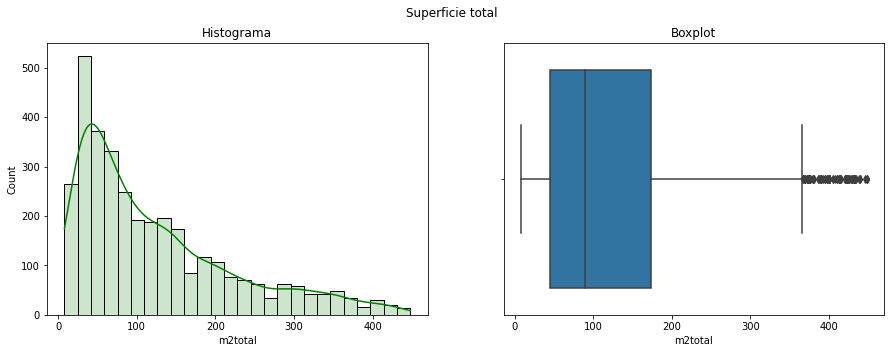

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie total')

# Histograma
sns.histplot(ax=axes[0], x =df_filtered['m2total'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=df_filtered['m2total'])
axes[1].set_title("Boxplot")

Se completaron datos nulos en la variable "m2total" usando datos de la variable "m2cub". 
Se detectaron outliers dentro de la variable "m2total" y se procedió a eliminarlos con el método IQR.

#### Metros cuadrados cubiertos

Text(0.5, 1.0, 'Boxplot')

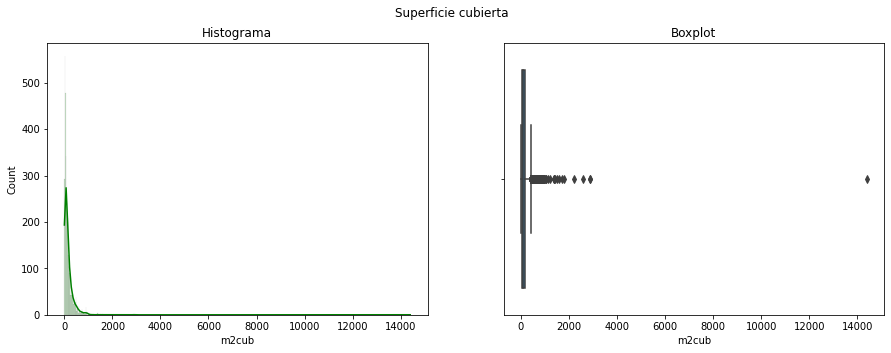

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie cubierta')

# Histograma
sns.histplot(ax=axes[0], x = data['m2cub'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2cub'])
axes[1].set_title("Boxplot")

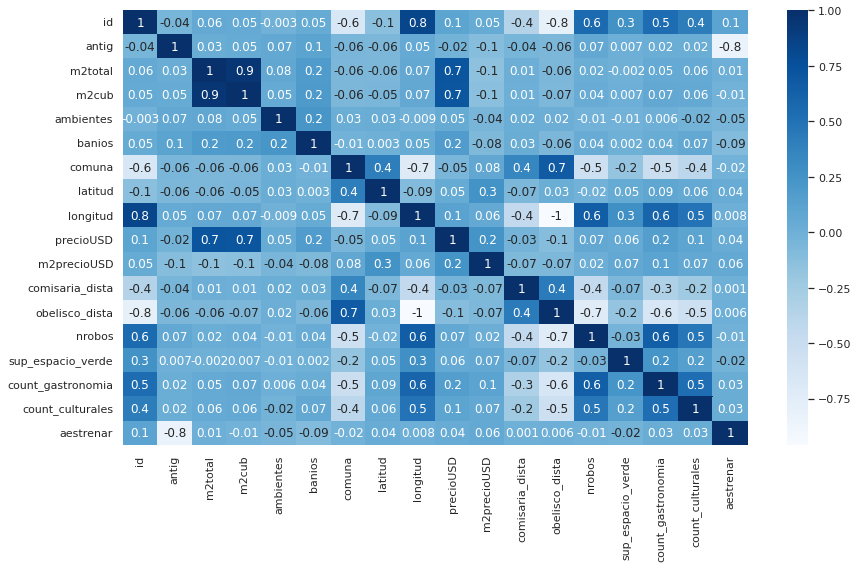

In [17]:
#Como m2cub esta correlacionada con m2total procederemos a eliminarla del data set.
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [18]:
df_filtered.drop("m2cub", axis=1, inplace=True)
df_filtered

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


id  m2total  ambientes  ...  count_gastronomia count_culturales aestrenar
0        1      200          0  ...                 12                0         1
1        2       50          0  ...                  3                0         0
2        3      414          0  ...                  5                0         0
3        4      414          0  ...                  5                0         0
4        5      285          0  ...                  5                0         0
...    ...      ...        ...  ...                ...              ...       ...
3705  3706       80          3  ...                 13                1         1
3706  3707       92          0  ...                 11                0         1
3707  3708       24          0  ...                  5                0         1
3708  3709       77          0  ...                 16                1         1
3709  3710       71          0  ...                  6                0         1

[3408 rows x 18 columns]

Se elimino la variable "m2cub" por estar correlacionada con la variable "m2total".

#### Cantidad de ambientes

Text(0.5, 1.0, 'Boxplot')

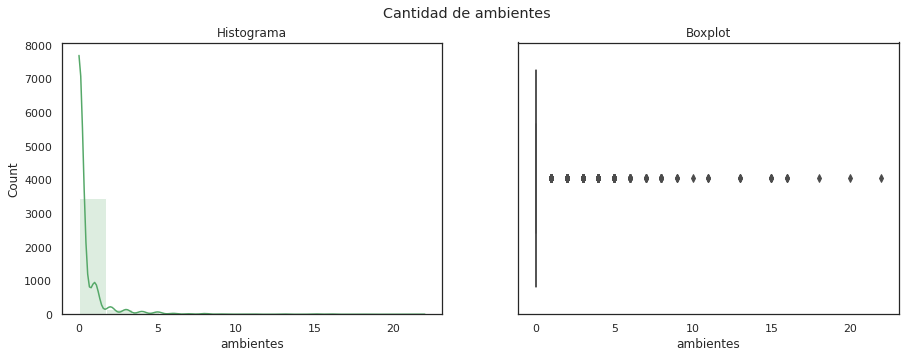

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de ambientes')

# Histograma
sns.histplot(ax=axes[0], x = data['ambientes'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['ambientes'])
axes[1].set_title("Boxplot")

In [20]:
cant_amb = data['ambientes'].value_counts()
cant_amb

0     3081
1      376
2       89
3       57
4       34
5       28
6       11
8        9
7        6
15       4
16       3
13       3
9        3
11       3
18       1
10       1
22       1
20       1
Name: ambientes, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   index  value
0      1   2820
1      0    588


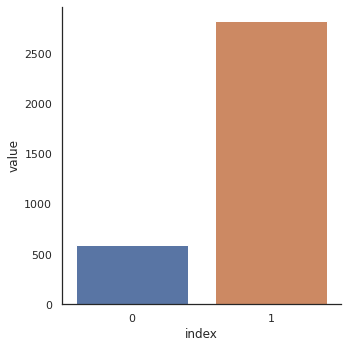

In [21]:
df_filtered['ambientes'].nunique()
ambis = []
for i in df_filtered["ambientes"]:
  if i == 0:
    ambis.append(1)
  else:
   ambis.append(0)

#Se agrega variable Aestrenar al data frame
df_filtered["monoambiente"] = ambis

#Se grafica la nueva variable
plot= df_filtered.monoambiente.value_counts().to_frame("value").reset_index()
print(plot)
sns.catplot(data=plot, x="index", y="value", kind="bar")

In [22]:
df_filtered.drop("ambientes", axis=1, inplace=True)
df_filtered

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


id  m2total  banios  ... count_culturales aestrenar  monoambiente
0        1      200       0  ...                0         1             1
1        2       50       1  ...                0         0             1
2        3      414       2  ...                0         0             1
3        4      414       2  ...                0         0             1
4        5      285       1  ...                0         0             1
...    ...      ...     ...  ...              ...       ...           ...
3705  3706       80       0  ...                1         1             0
3706  3707       92       1  ...                0         1             1
3707  3708       24       1  ...                0         1             1
3708  3709       77       1  ...                1         1             1
3709  3710       71       0  ...                0         1             1

[3408 rows x 18 columns]

#### Cantidad de baños

Text(0.5, 1.0, 'Boxplot')

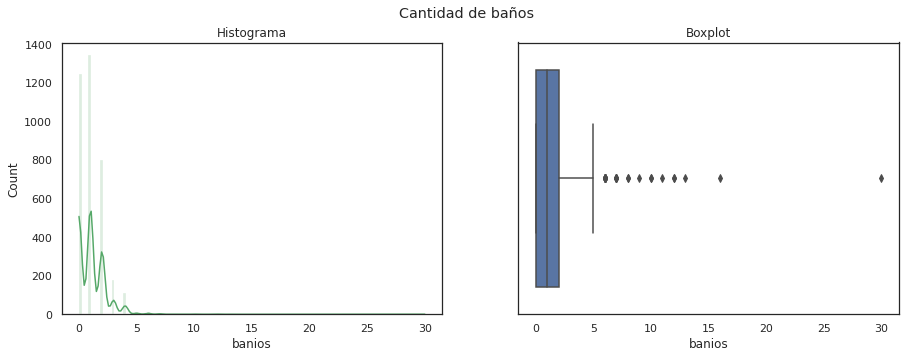

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de baños')

# Histograma
sns.histplot(ax=axes[0], x = data['banios'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['banios'])
axes[1].set_title("Boxplot")

In [24]:
cant_ban = df_filtered['banios'].value_counts()
cant_ban

1     1321
0     1116
2      758
3      133
4       65
5        7
7        3
6        2
11       1
12       1
10       1
Name: banios, dtype: int64

In [25]:
df_filtered.loc[(df_filtered["banios"] == 0), ["banios"]] = 0
df_filtered.loc[(df_filtered["banios"] == 1), ["banios"]] = 1
df_filtered.loc[(df_filtered["banios"] == 2), ["banios"]] = 2
df_filtered.loc[(df_filtered["banios"] >= 3), ["banios"]] = 3


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

   index  value
0      1   1321
1      0   1116
2      2    758
3      3    213


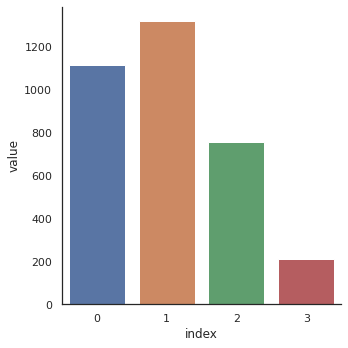

In [30]:
cant_ban2 = df_filtered['banios'].value_counts()
cant_ban2
plot= cant_ban2.to_frame("value").reset_index()
print(plot)
sns.catplot(data=plot, x="index", y="value", kind="bar")

Se agrupo aquellos con 3 o más baños en una sola categoría

#### Barrios

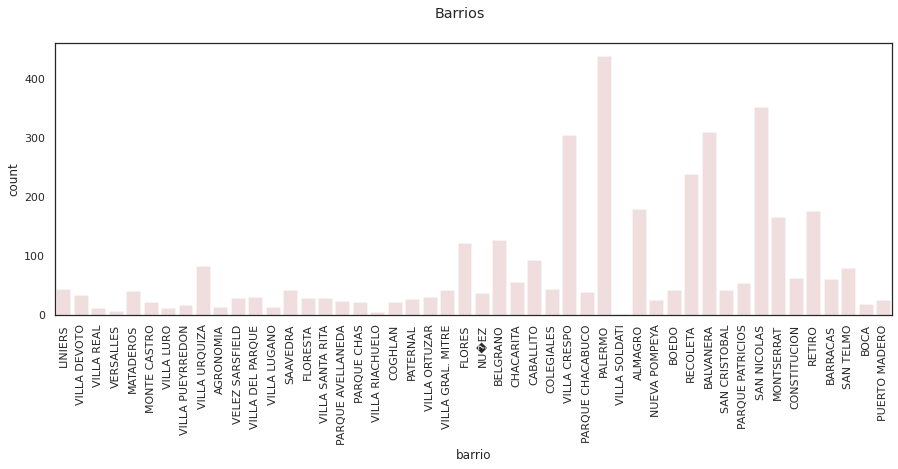

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
fig.suptitle('Barrios')

# Histograma
sns.countplot(x = data['barrio'], color='r', alpha = 0.2)
axes.tick_params(axis='x', rotation=90)

#### Comunas

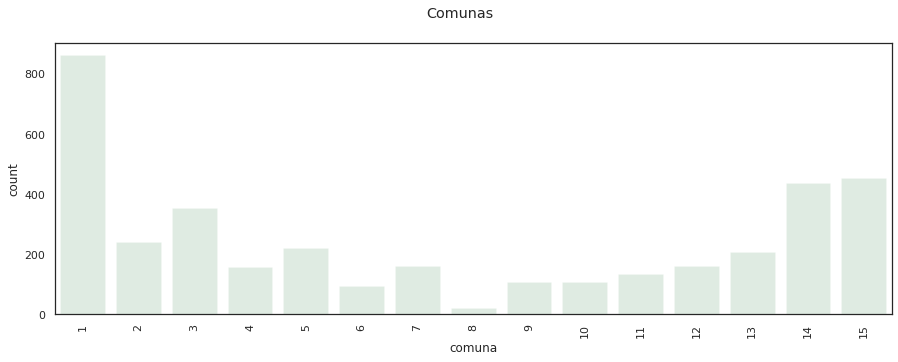

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
fig.suptitle('Comunas')

# Histograma
sns.countplot(x = data['comuna'], color='g', alpha = 0.2)
axes.tick_params(axis='x', rotation=90)

#### Precio

Text(0.5, 1.0, 'Boxplot')

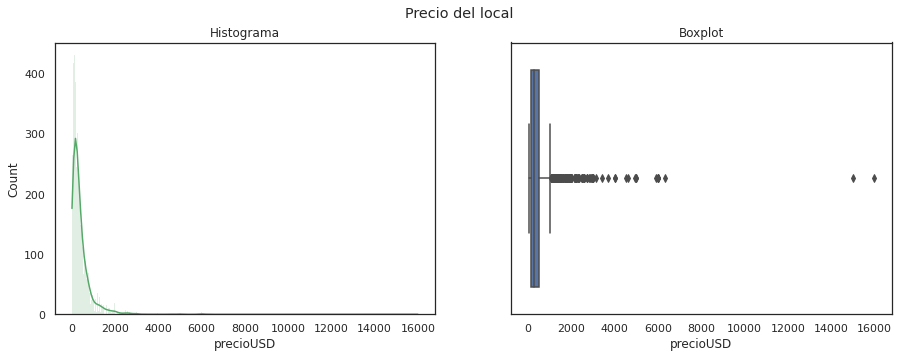

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Precio del local')

# Histograma
sns.histplot(ax=axes[0], x = data['precioUSD']/1000, color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['precioUSD']/1000)
axes[1].set_title("Boxplot")

#### Precio del metro cuadrado

Text(0.5, 1.0, 'Boxplot')

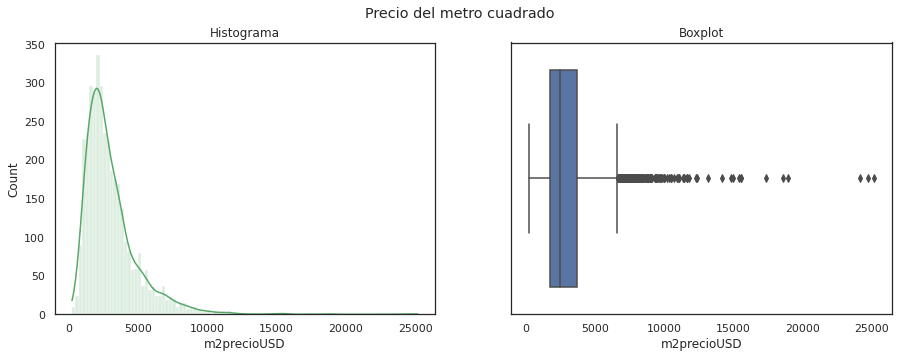

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Precio del metro cuadrado')

# Histograma
sns.histplot(ax=axes[0], x = data['m2precioUSD'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2precioUSD'])
axes[1].set_title("Boxplot")

#### Distancia a las comisarias

Text(0.5, 1.0, 'Boxplot')

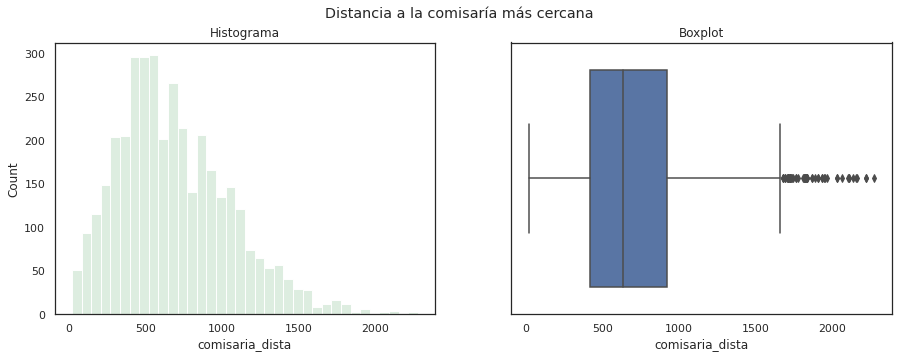

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distancia a la comisaría más cercana')

# Histograma
sns.histplot(ax=axes[0], x = data['comisaria_dista'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['comisaria_dista'])
axes[1].set_title("Boxplot")

#### Distancia al Obelisco

Text(0.5, 1.0, 'Boxplot')

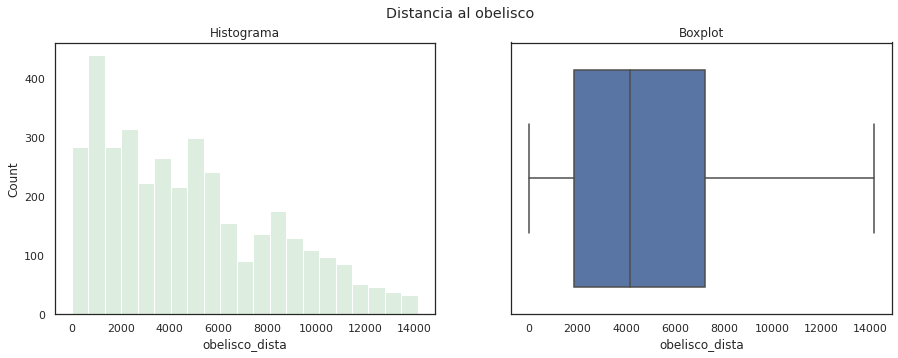

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distancia al obelisco')

# Histograma
sns.histplot(ax=axes[0], x = data['obelisco_dista'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['obelisco_dista'])
axes[1].set_title("Boxplot")

#### Cantidad de robos

Text(0.5, 1.0, 'Boxplot')

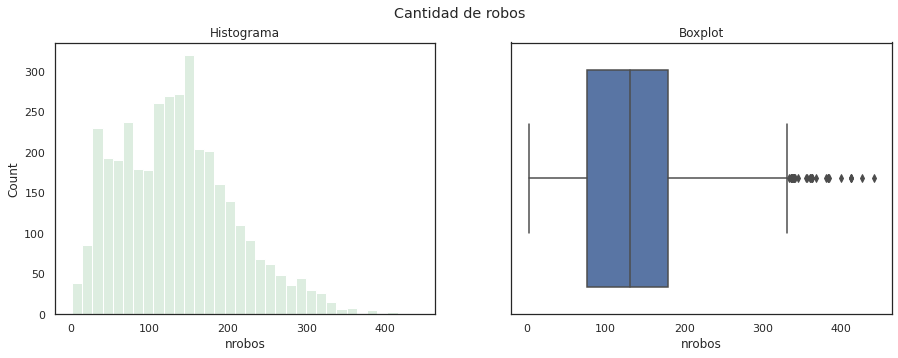

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de robos')

# Histograma
sns.histplot(ax=axes[0], x = data['nrobos'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['nrobos'])
axes[1].set_title("Boxplot")

#### Superficie de espacios verdes

Text(0.5, 1.0, 'Boxplot')

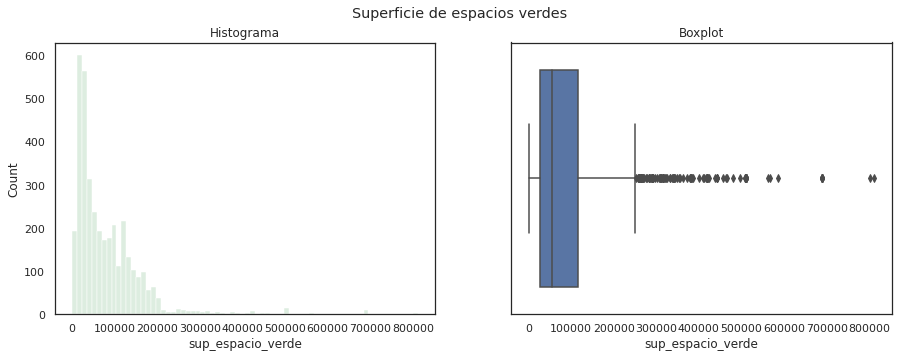

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie de espacios verdes')

# Histograma
sns.histplot(ax=axes[0], x = data['sup_espacio_verde'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['sup_espacio_verde'])
axes[1].set_title("Boxplot")

#### Cantidad de espacios gastronomicos

Text(0.5, 1.0, 'Boxplot')

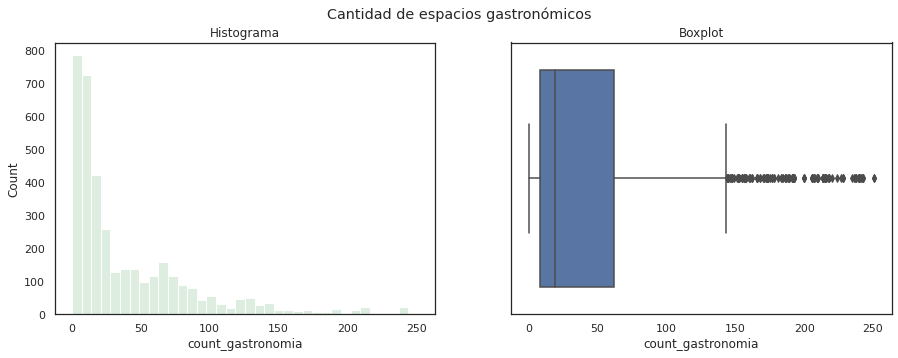

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de espacios gastronómicos')

# Histograma
sns.histplot(ax=axes[0], x = data['count_gastronomia'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['count_gastronomia'])
axes[1].set_title("Boxplot")

#### Cantidad de espacios culturales

Text(0.5, 1.0, 'Boxplot')

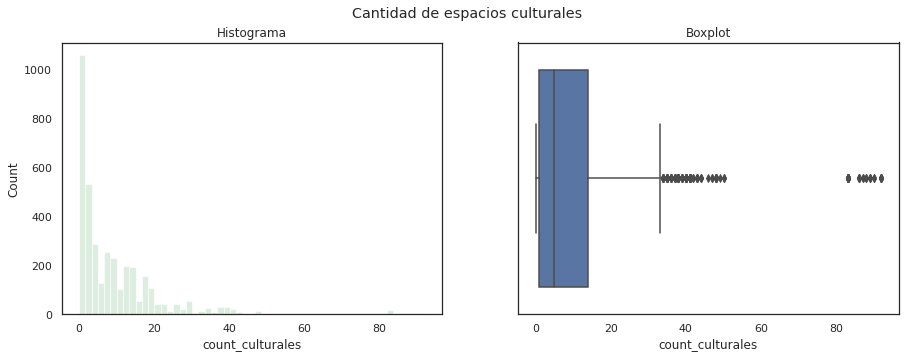

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de espacios culturales')

# Histograma
sns.histplot(ax=axes[0], x = data['count_culturales'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['count_culturales'])
axes[1].set_title("Boxplot")

# Modelo

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
## Utilizamos como predictoras todas las variables, 
## excepto la variable objetivo
X = df_filtered.drop(columns=["precioUSD"])
y = df_filtered["precioUSD"]

In [47]:
#Dividimos el dataset en un conjunto de entrenamiento y uno de evaluación. Por simplicidad, no utilizaremos conjunto de validación,
#sino que validaremos nuestro modelo directamente sobre el conjunto de evaluación.

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=22)

In [48]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

## Aplicamos la transformación de escala sobre los features
scaler_X.fit(X_train)
X_scaled_train = scaler_X.transform(X_train)
X_scaled_test  = scaler_X.transform(X_test)

## Aplicamos la transformación de escala sobre la variable objetivo
## Observación: StandardScaler toma como input una matriz. Si queremos darle un
## vector (como por ej. para utilizar con la variable objetivo), tenemos que 
## transformar ese vector en una matriz de una sola columna. Esto lo hacemos
## con el método 'reshape'
scaler_y.fit(y_train.values.reshape(-1, 1))
y_scaled_train = scaler_y.transform(y_train.values.reshape(-1, 1))[:,0]
y_scaled_test  = scaler_y.transform(y_test.values.reshape(-1, 1))[:,0]

ValueError: ignored

### Análisis de variables numéricas

In [ ]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

id  antig  m2total  ...  sup_espacio_verde  count_gastronomia  count_culturales
0   1      0      200  ...          68426.445                 12                 0
1   2     30       50  ...         110997.543                  3                 0
2   3     30      414  ...         115341.039                  5                 0
3   4     35      414  ...         115500.289                  5                 0
4   5     35      285  ...         115500.289                  5                 0

[5 rows x 17 columns]

In [ ]:
data_num_corr = data_num.corr()['precioUSD'][:-1] # -1 because the latest row is SalePrice
golden_features_list = data_num_corr[abs(data_num_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with SalePrice:
precioUSD      1.000000
m2total        0.719246
m2cub          0.710366
m2precioUSD    0.246963
Name: precioUSD, dtype: float64


In [ ]:
data_num.corr()

id     antig  ...  count_gastronomia  count_culturales
id                 1.000000 -0.037895  ...           0.534734          0.422997
antig             -0.037895  1.000000  ...           0.021218          0.020931
m2total            0.060682  0.030820  ...           0.053510          0.056999
m2cub              0.054730  0.047563  ...           0.070705          0.062523
ambientes         -0.003471  0.069789  ...           0.005787         -0.020525
banios             0.046484  0.105140  ...           0.035061          0.072506
comuna            -0.646787 -0.055023  ...          -0.508838         -0.403065
latitud           -0.131673 -0.058541  ...           0.093942          0.063555
longitud           0.837567  0.052353  ...           0.598001          0.487015
precioUSD          0.103088 -0.021312  ...           0.159050          0.098373
m2precioUSD        0.045549 -0.114702  ...           0.112863          0.067275
comisaria_dista   -0.361019 -0.038303  ...          -0.332288         -0.227397
obelisco_dista    -0.790095 -0.064225  ...          -0.637848         -0.544813
nrobos             0.550731  0.071549  ...           0.644573          0.464842
sup_espacio_verde  0.262865  0.006571  ...           0.237284          0.155624
count_gastronomia  0.534734  0.021218  ...           1.000000          0.528846
count_culturales   0.422997  0.020931  ...           0.528846          1.000000

[17 rows x 17 columns]

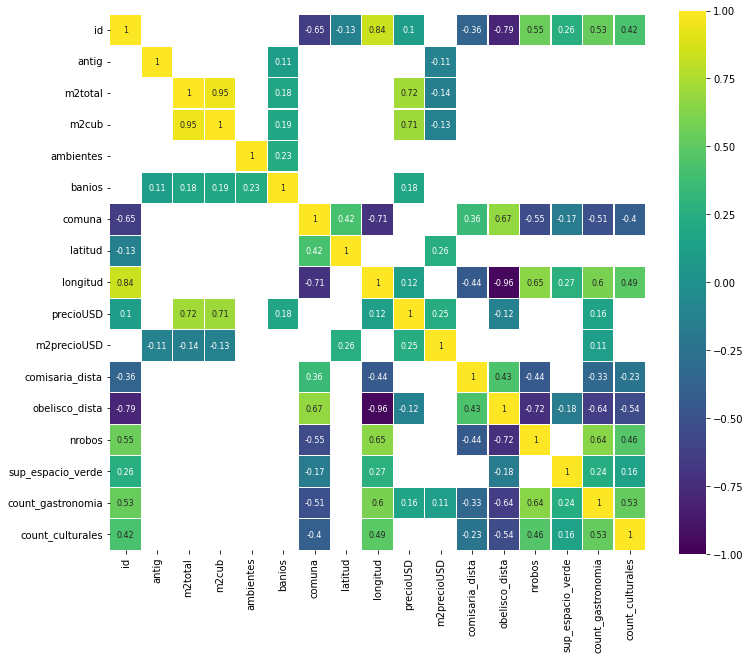

In [ ]:
corr = data_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Analisis C -> Q (relación catogeórica - cuantitativa)

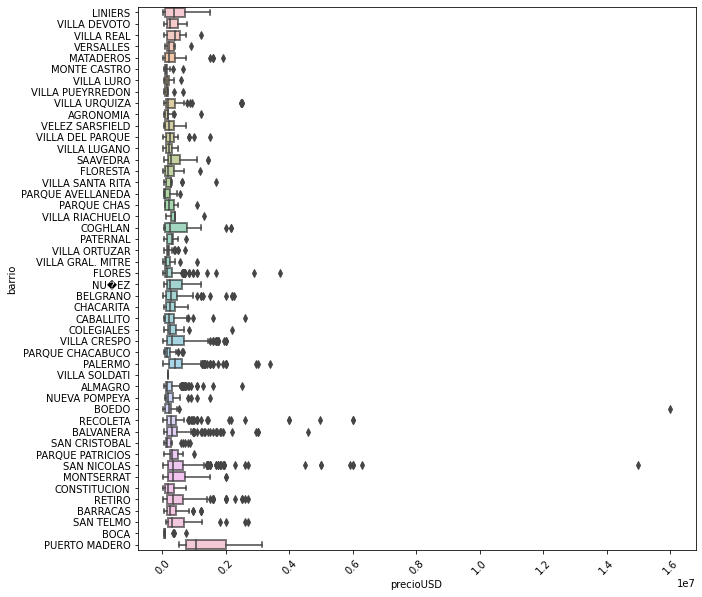

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x='precioUSD', y='barrio', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

### Variables cuantitativas vs Barrios

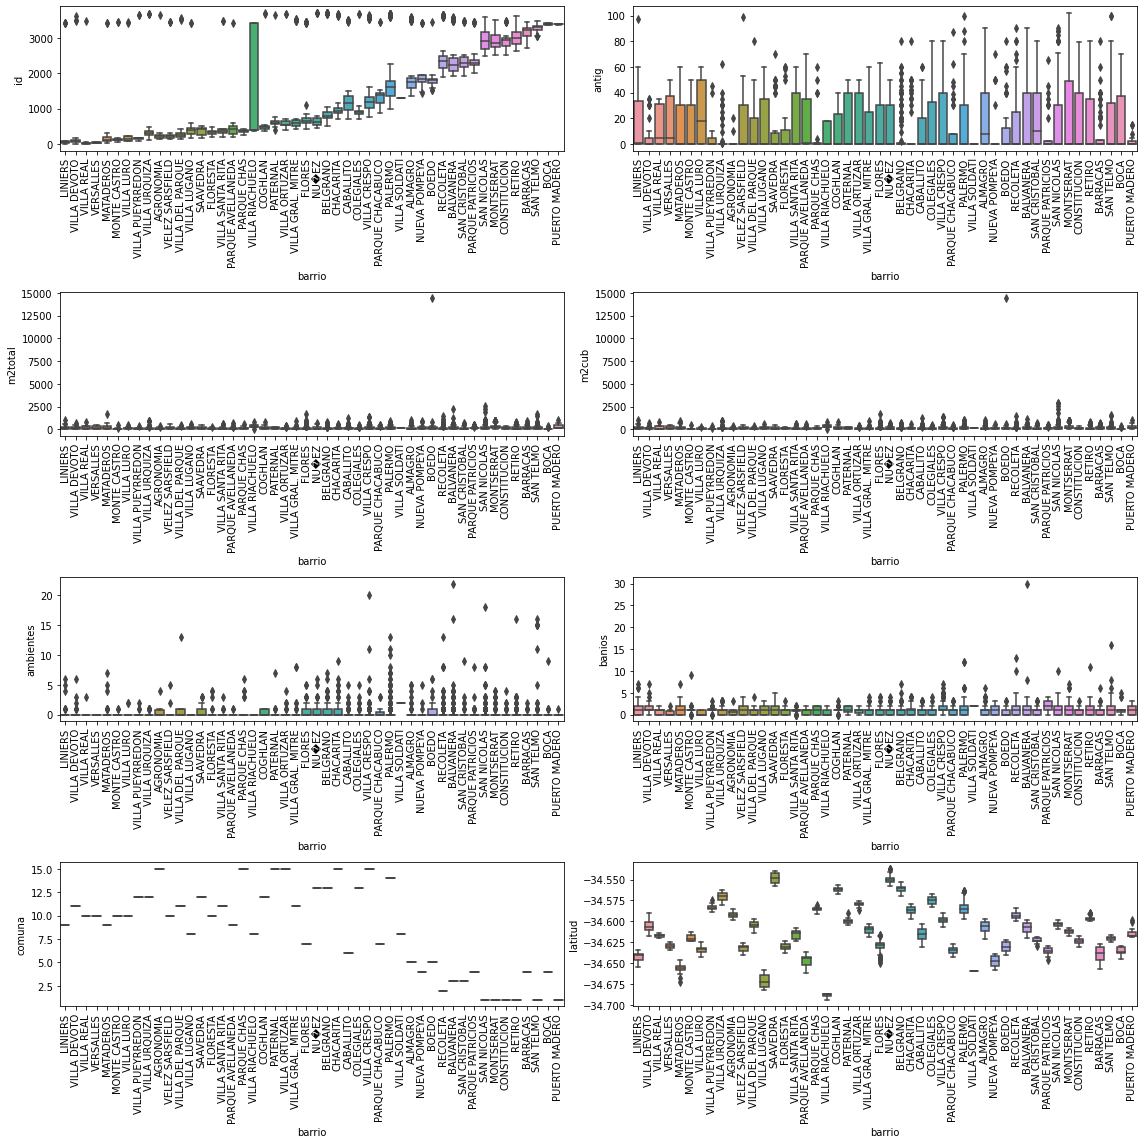

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, ax in enumerate(fig.axes):
    if i < len(data_num.columns):
        sns.boxplot(y = data_num[data_num.columns[i]], x = data.barrio, ax=ax)
        ax.tick_params(axis='x', rotation=90)
fig.tight_layout()

## Análisis exploratorio espacial

In [ ]:
%matplotlib inline

import numpy
import pandas
import geopandas
# Graphics
from pysal.viz import splot
from splot.esda import plot_moran
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
# Analysis
import pysal
import contextily
import libpysal
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed
from sklearn.cluster import DBSCAN
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [ ]:
data.head()

id  antig  m2total  m2cub  ambientes  banios             direccion  \
0   1      0      200    200          0       0  Gral Paz y Rivadavia   
1   2     30       50     50          0       1              Asuncion   
2   3     30      414    414          0       2    Avenida Beiro 5574   
3   4     35      414    414          0       2    Avenida Beiro 5574   
4   5     35      285    285          0       1    Avenida Beiro 5574   

         barrio  comuna    latitud   longitud  precioUSD  m2precioUSD  \
0       LINIERS       9 -34.639300 -58.528647    1500000  7500.000000   
1  VILLA DEVOTO      11 -34.611807 -58.528138     125000  2500.000000   
2    VILLA REAL      10 -34.616468 -58.528111     590000  1425.120773   
3    VILLA REAL      10 -34.616344 -58.527918     730000  1763.000000   
4    VILLA REAL      10 -34.616344 -58.527918     550000  1929.000000   

   comisaria_dista  obelisco_dista  nrobos  sup_espacio_verde  \
0      1162.621600    14053.797191     134          68426.445   
1      1887.227055    13473.139375      23         110997.543   
2      1497.020434    13514.662463      33         115341.039   
3      1506.066814    13495.631683      33         115500.289   
4      1506.066814    13495.631683      33         115500.289   

   count_gastronomia  count_culturales  
0                 12                 0  
1                  3                 0  
2                  5                 0  
3                  5                 0  
4                  5                 0

##### Convertir a datos espaciales

In [ ]:
# Convertir base de datos de locales a geodataframe
geo_data = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitud, data.latitud, crs = 4326)).to_crs(epsg=3857)
# Descargar geojson de la base de datos del gobierno de CABA
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson"
barrios = geopandas.read_file(url).to_crs(epsg=3857)

In [ ]:
# Obtener coordenadas planares
geo_data['lon_planar'] = geo_data['geometry'].x
geo_data['lat_planar'] = geo_data['geometry'].y

#### Ubicación de los locales

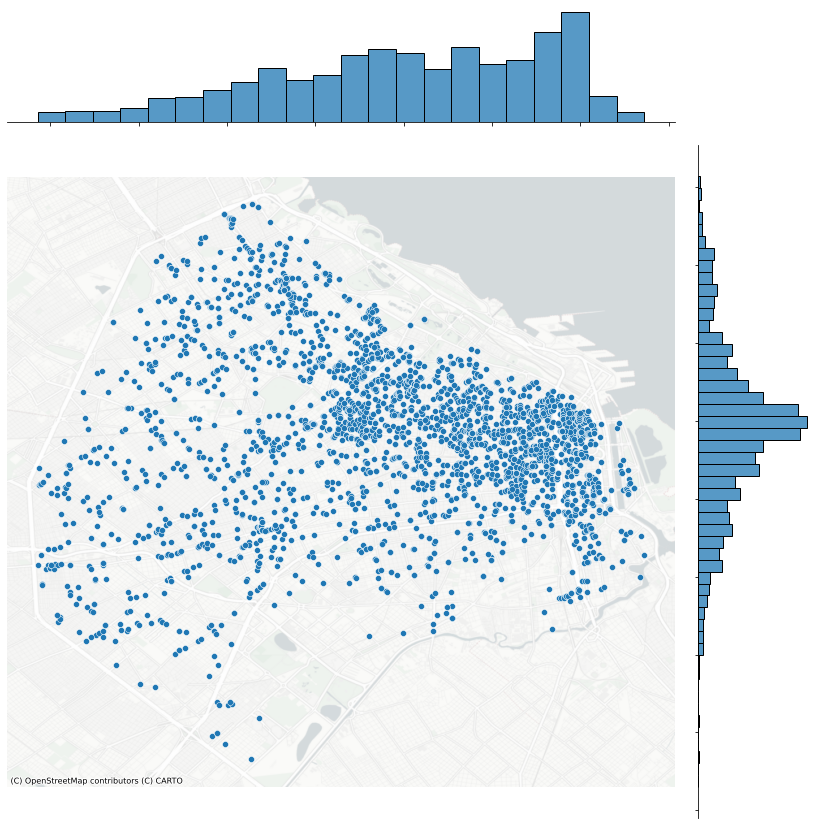

In [ ]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='longitud', y='latitud', data=geo_data, height=12
)
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [ ]:
# Extentensión de los locales
bounding_box = [geo_data["geometry"].x.min(), geo_data["geometry"].x.max(), geo_data["geometry"].y.min(), geo_data["geometry"].y.max()]
# Cargar mapa base
tilemapbase.start_logging()
tilemapbase.init(create=True)
extent = tilemapbase.extent_from_frame(geo_data, buffer = 10)

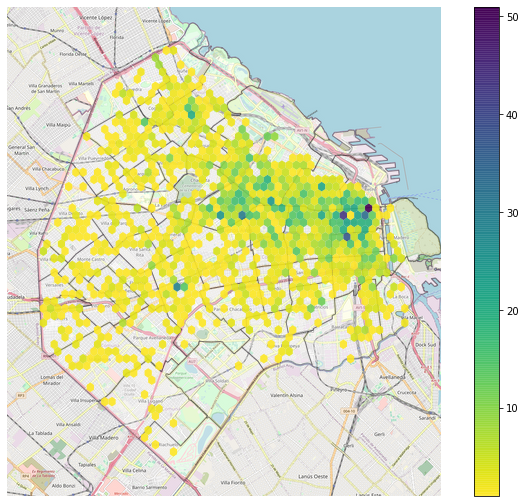

In [ ]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    x = geo_data["geometry"].x,
    y = geo_data["geometry"].y,
    gridsize=50, 
    linewidths=0,
    alpha=0.9, 
    cmap='viridis_r',
    mincnt=1
)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

#### Densidad de locales 

AttributeError: 'AxesSubplot' object has no attribute 'get_array'

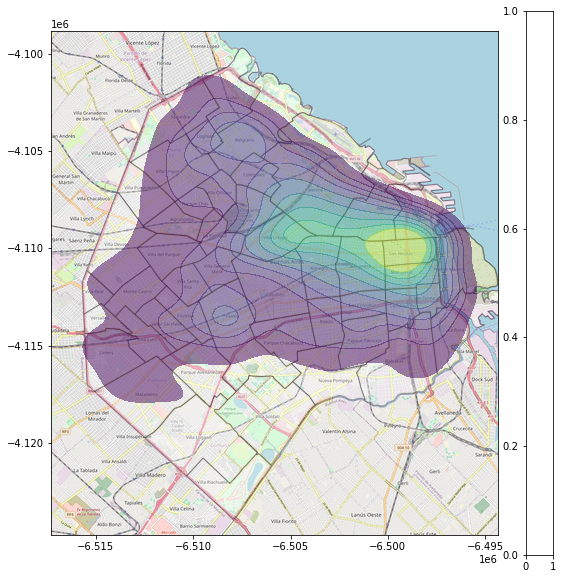

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
density_plot = sns.kdeplot(
                x = geo_data["geometry"].x,
                y = geo_data["geometry"].y,
                shade=True,
                alpha=0.5,
                cmap="viridis",
                #shade_lowest=False,
                thresh = 0.05,
                zorder=3
                )
# Add colorbar
plt.colorbar(density_plot)
# Remove axes
ax.set_axis_off()

#### Centrografía

La centrografía es el análisis de la centralidad de un patrón de puntos. Por centraliad se refiere a la ubicación general de la distribución de puntos y al patrón de dispersión. Si el hexabin podría considerarse como un histograma espacial, la centragrafía sería el equivalente espacial a las medidas de tendencia central como la media o mediana y a las medidas de dispersión. Estas medidas son útiles ya que permiten resumir la distribución espacial de un único punto. Existen muchos indices en centragrafía para caracterizar el patrón de puntos y describir cuán compacto es alrededor de su centro de masa o cuán irregular es su forma. 

##### Posición

In [ ]:
# Calculo de la media y mediana del patrón de puntos
mean_center = centrography.mean_center(geo_data[['lon_planar', 'lat_planar']])
med_center = centrography.euclidean_median(geo_data[['lon_planar', 'lat_planar']])

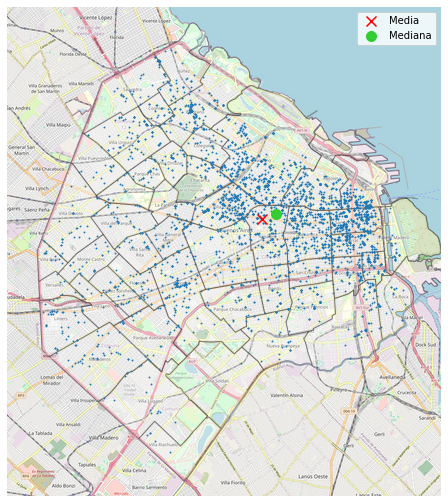

In [ ]:
# Preparar girua
f, ax = plt.subplots(1, figsize=(12, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
# Agregar locales
ax.scatter(geo_data['lon_planar'], geo_data['lat_planar'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Media', s = 100, zorder = 10)
# Agregar medidas de pocisión
ax.scatter(*med_center, color='limegreen', marker='o', label='Mediana', s = 100, zorder = 10)


# Agregar leyenda
ax.legend()
# Quitar ejex
ax.set_axis_off()
# Mostrar figura
plt.show()

##### Dispersión

In [ ]:
major, minor, rotation = centrography.ellipse(geo_data[['lon_planar','lat_planar']])

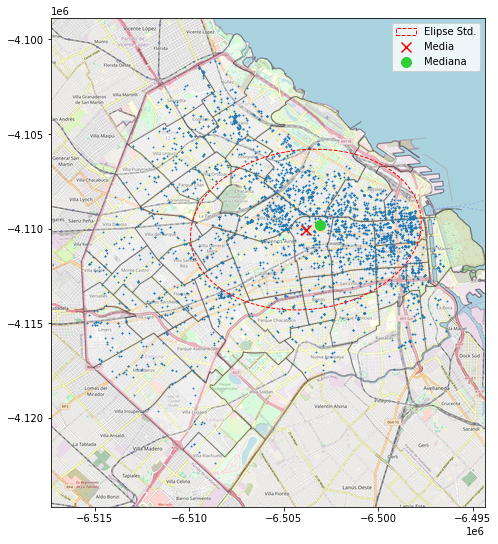

In [ ]:
# Preparar girua
f, ax = plt.subplots(1, figsize=(12, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
# Plot photograph points
# Agregar locales
ax.scatter(geo_data['lon_planar'], geo_data['lat_planar'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Media', s = 100, zorder = 10)
# Agregar medidas de pocisión
ax.scatter(*med_center, color='limegreen', marker='o', label='Mediana', s = 100, zorder = 10)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Elipse Std.')
ax.add_patch(ellipse)

ax.legend()
# Display
# Display
plt.show()

#### Aleatoriedad y clustering

In [ ]:
coordinates = geo_data[['lon_planar', 'lat_planar']].values

In [ ]:
# Crear puntos aleatorios a partir de los datos
# Se repeta la distribución de los datos originales

alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/pygeos/io.py:72: UserWarning: The shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the PyGEOS GEOS version (3.10.0-CAPI-1.16.0). Conversions between both will be slow
  warnings.warn(


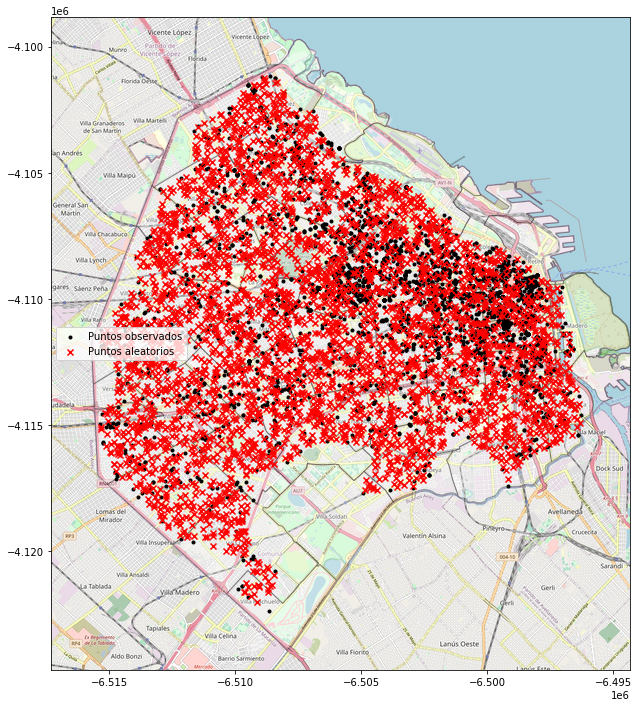

In [ ]:
f,ax = plt.subplots(1, figsize=(12, 12))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

plt.scatter(*coordinates.T, color='k', marker='.', label='Puntos observados')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Puntos aleatorios')

ax.legend(ncol=1, loc='center left')
plt.show()

Los puntos se pueden analizar para comporbar si su distribución es el azar o no. Esto es importante porque algunas técnicas espaciales asumen que los datos surgen de procesos estocásticos. 

La prueba usada es similar al Chi-cuadrado. Se realizar una cuadrícula y se evalúan las proporciones de puntos dentro de cada cuadrante y se lo compara con una distribución al azar. 

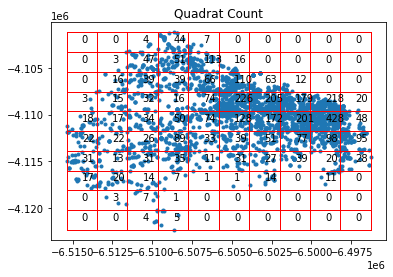

El p-valor de la prueba es 0.0


In [ ]:
qstat = QStatistic(coordinates, nx = 10, ny = 10)
qstat.plot()

print("El p-valor de la prueba es", qstat.chi2_pvalue)

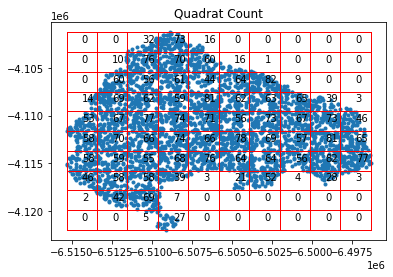

El p-valor de la prueba es 0.0


In [ ]:
qstat_null = QStatistic(random_pattern_ashape, nx = 10, ny = 10)
qstat_null.plot()

print("El p-valor de la prueba es", qstat_null.chi2_pvalue)

Dado que los p-valores de ambas pruebas son menos a 0.05 se puede concluir que dentro del área en estudio, el patrón espacial es completamene aleatorio.  

Un segundo grupo de estadísticos espaciales consideran la distribución de dos métricas en el patrón de puntos: diastancia de los vecinos más cercanos y "huecos" dentro del patrón de puntos. Para ver más detalles se sugiere ver Ripley (1991) donde se describe cómo caracterizar agrupamientos o co-localizaciones en el patrón de puntos. 

El primer tipo estadístico usado en el presente trabajo es la fución G de Ripley que se centra en la distribución de las distancias a los vecinos más cercanos. Es decir, la función G resume las distancias entre cada punto en el patrón y su vecino más cercano. La función contempla la proporción de puntos que son considerados vecinos más cercanos de cada observación dentro de una determinada distancia del mismo. Luego acumula la porpoción de vecinos a medida que se aumenta el radio al rededor de cada punto. La distribución del porcentaje acumulado tiene una forma característica cuando el proceso espacial es completamente aleatorizado. La lógica tras esta función es la siguiente: se puede conocer cuando similar es el patrón de puntos en comparación a uno aleatorio al comparar la distribución acumulada de los vecinos más cercanos a medida que aumenta la distancia. Al comparar la distribución empírica con patrones simulados que tienen una distribución espacial conocida es posible hacer un contraste. Usualmente el proceso espacial usado como referencia es uno Poisson. 

In [ ]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

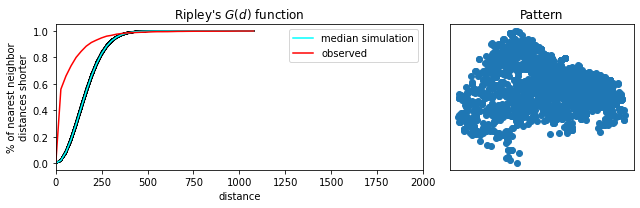

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, numpy.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

Un patrón agrupado debería tener una mayor cantidad de puntos cercanos entre sí en comparación a uno más "disperso", mientras que un proceso aleatoria estaría en algún punto intermedio. Por lo tanto, si la función 𝐺 aumenta rápidamente con la distancia, probablemente se trata de un patrón agrupado en clsuters. Se aumenta lentamente con la distancia, se trataría de un patrón disperso. 

En el gráfico de la izquierda se muestra la G(d), la distancia entre puntos se muestra en el eje x y la fracción de distancias entre vecinos menores al umbral _d_. La curva azul corresponde a la mediana de las _n_ simulaciones de un proceso espacial conocido. La curva roja, mientras tanto, corresponde a la función empírica calculada a partir de los datos. Dado que la roja aumenta con más rapiez que las simulaciones, se puede concluir que la distribución de los locales es más próxima entre ellos que lo que sería si se tratase de una distribución completamente aleatorizada. El patrón de puntos está agrupado. 

Cabe mencionar que este agrupamiento tiene que ver sólo con la ubicación espacial y no con los atributos de cada punto. 

La segunda función usada para caracterizar al patrón espacial de puntos es la función 𝐹 de Ripley. Mientras que la función 𝐺 se centra en las distancias entre puntos dentro del patrón, la 𝐹 analiza la distancia a los puntos desde los distintos espacios vaciós del patrón. Esto que también se conozca a la función 𝐹 como la función de espacios vaciós dado que caracteriza la distancia media desde puntos arbitrarios en los espacios vaciós al patrón de puntos. Más especificamente la funcion 𝐹 acumula, en un gradiente creciente de distancias, el porcentaje de puntos que se pueden encontrar dentro de un rango de distancia y lo compara con el que se encontraría si el procesos fuese completamente aleatorizado. Si el patró tiene muchos "huecps" la tasa de crecimiento de la función 𝐹 será baja. Caso contrario ocurriría si el patrón es muy disperso. Para realizar el contraste se compara nuevamente la función 𝐹 de los datos observados vs la misma función calculada sobre un set de datos con un patrón conocido. 

In [ ]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

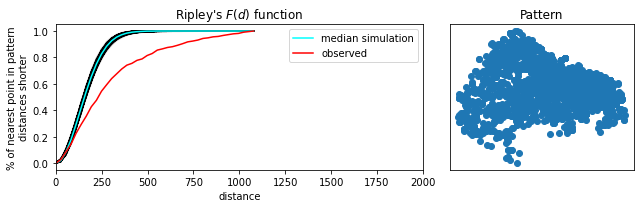

In [ ]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

Dado que la función 𝐹 aumenta más lentamente que la función teórica, se podría concluir que los datos se encuentran agrupados

Al confirmar la presencia de grupos de datos, étos pueden identificarse mediante técnicas de clustering similares a las utilizadas durante la Diplomatura. Sin embargo, debe quedar claro que estos agrupamientos surgen de la posicion de los locales en el espacio y nada tiene que ver son las características discutidas en secciones anteriores. 

In [ ]:
# Cantidad minima de puntos por cluster. En este caso 1%
minp = numpy.round(geo_data.shape[0] * 0.01)
minp

37.0

Desde el punto de vista de la técnica usada, DBSCAN, un cluster es una concentración de al menos _n_ puntos, cada uno dentro de una distancia _r_ de al menos otro punto dentro del cluster. Bajo esta premisa, el algortimo clasifica tres categorías:

* Ruido: puntos fuera del cluster.
* Núcleos: puntos dentro del cluster de al menos _m_ puntos dentro de la diatancia _r_. 
* Bordes: puntos dentro del cluster con menos _m_ puntos dentro de la distancia _r_. 

In [ ]:
#  DBSCAN
clusterer = DBSCAN(eps = 500, min_samples = minp) # eps: distancia mínima en metros; min_samples: distancia minima entre puntos
# Fit to our data
clusterer.fit(geo_data[['lon_planar', 'lat_planar']])

DBSCAN(eps=500, min_samples=37.0)

In [ ]:
# Cantidad 
len(clusterer.core_sample_indices_)

1656

Con esta configuracion se identificaron 1656 núcleos comerciales (centroides) alrededor de los cuales se agrupan los demás locales. La configuración del algortimo es basnte arbitraria y se necesataría de un experto en el domino para definir mejor las distancias y cantidad de observaciones por grupo. 

In [ ]:
# Etiquetas de los tipo de datos
# -1: ruido
# 0: núcleo
# 1: borde
lbls = pandas.Series(clusterer.labels_, index=geo_data.index)

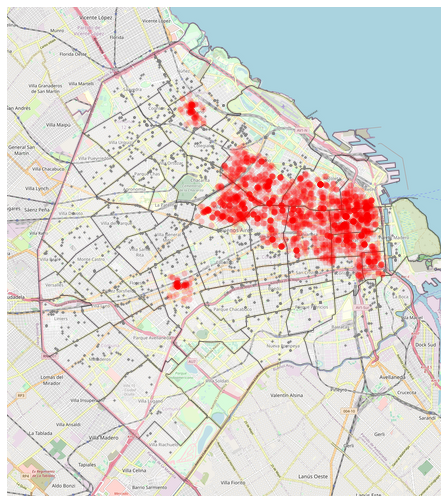

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

# Quitar los puntos que no forman parte de ningún cluster (ruido)
noise = geo_data.loc[lbls==-1, ['lon_planar', 'lat_planar']]
# Graficar ruido en gris
ax.scatter(noise['lon_planar'], noise['lat_planar'], c='grey', s=5, linewidth=0)
# Graficar el rest de los puntos como miembros de un cluster
# Se toma la diferencia entre los índices de ruido y el resto de los datos
ax.scatter(geo_data.loc[geo_data.index.difference(noise.index), 'lon_planar'], \
           geo_data.loc[geo_data.index.difference(noise.index), 'lat_planar'], \
          c='red', linewidth=0, alpha = 0.2)

# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

Los puntos en rojos pertenecen a un cluster mientras que los grises son observaciones asiladas que no pertenecen a ninguno. Se observa como las áreas comerciales más importantes se ubican en el noreste de la ciudad y en proximidades a avenidas importantes. 

#### Variación espacial de las variables

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


##### Precio en USD

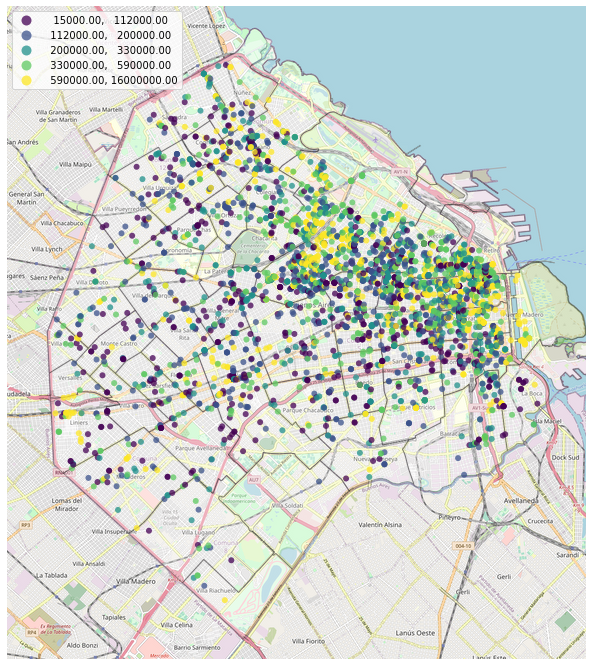

In [ ]:
# Clasificacion por percentiles del precio de venta
f, ax = plt.subplots(1, figsize=(12, 12))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

geo_data.plot(column='precioUSD', 
        cmap='viridis', 
        scheme='quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={"loc": 2},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
from libpysal.weights import Queen, Rook, KNN


In [ ]:
# Calcular matriz de pesos espaciales
w = weights.KNN.from_dataframe(geo_data, k = 20)
# Row-standardization
w.transform = 'R'

In [ ]:
def spatial_lagged_plot(geodataframe, variable, plot = True, results = False):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(w, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Graficar
    if plot:
        f, axs = plt.subplots(1, 2, figsize=(16, 10))
        ax1, ax2 = axs

        # Agregar mapa base
        plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
        plotter.plot(ax1)
        # Agregar barrios
        barrios.plot(ax=ax1, alpha=0.3, edgecolor="black", facecolor="white")
        geo_data_exploratory.plot(column = variable, cmap='viridis', scheme='quantiles',
                k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
        ax1.set_axis_off()
        ax1.set_title(variable)


        # Agregar mapa base
        plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
        plotter.plot(ax2)
        # Agregar barrios
        barrios.plot(ax=ax2, alpha=0.3, edgecolor="black", facecolor="white")
        geo_data_exploratory.plot(column = lagged_variable, cmap='viridis', scheme='quantiles',
                k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
        ax2.set_axis_off()
        ax2.set_title(lagged_variable)

        plt.show()
        
        # Devolver resultados en un GeoDataFrame
        if results:
            return(geo_data_exploratory)


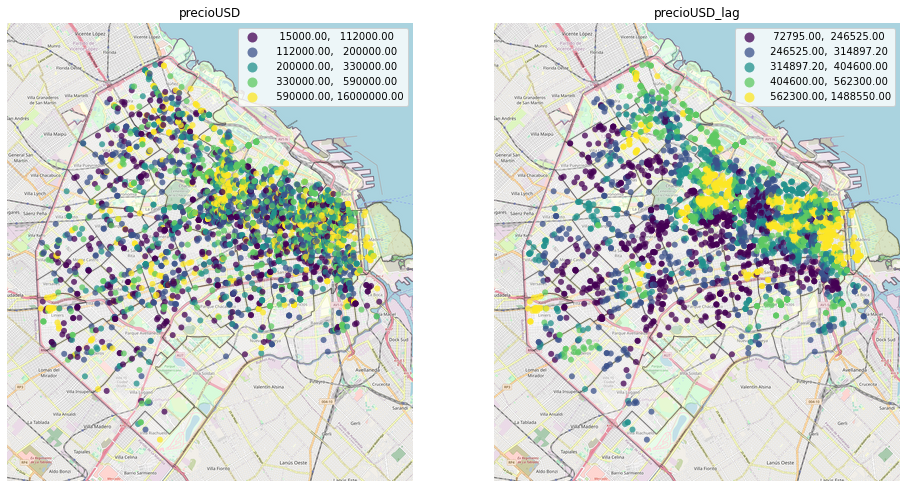

In [ ]:
spatial_lagged_plot(geodataframe = geo_data, variable = 'precioUSD')

El mapa de quintiles de la variable espacial lag tiende a aumentar la impresión de similaridad entre valores en el espacio. EN esencia se trata de un suavizado local. 

#### Indice de Moran

In [ ]:
def moran_spot_map(geodataframe, variable, matriz_pesos, plot = True, hot = True):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(matriz_pesos, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Calculo del índice de Morán
    li = esda.moran.Moran_Local(geo_data_exploratory[variable], matriz_pesos)
    # Clases de resultados
    sig = li.p_sim < 0.05
    hotspot = sig * li.q==1
    coldspot = sig * li.q==3
    doughnut = sig * li.q==2
    diamond = sig * li.q==4
    
    if hot:
        # Caracterizar los puntos
        spots = ['n.sig.', 'hot spot']
        labels = [spots[i] for i in hotspot*1]
        # Escala de colores
        hmap = colors.ListedColormap(['red', 'lightgrey'])
    else:
        spots = ['n.sig.', 'cold spot']
        labels = [spots[i] for i in coldspot*1]
        # Escala de colores
        hmap = colors.ListedColormap(['blue', 'lightgrey'])
    
    # Graficar 
    f, ax = plt.subplots(1, figsize=(12, 12))
     # Agregar mapa base
    plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.Carto_Dark, width=1000)
    plotter.plot(ax)
    # Agregar barrios
    barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
    geo_data_exploratory.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.01, ax=ax, \
            edgecolor='white', legend=True, alpha = 0.7)
    ax.set_axis_off()
    plt.show()
    

In [ ]:
def moran_quadrants_map(geodataframe, variable, matriz_pesos, plot = True):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(matriz_pesos, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Calculo del índice de Morán
    li = esda.moran.Moran_Local(geo_data_exploratory[variable], matriz_pesos)
    # Clases de resultados
    sig = 1 * (li.p_sim < 0.05)
    hotspot = 1 * (sig * li.q==1)
    coldspot = 3 * (sig * li.q==3)
    doughnut = 2 * (sig * li.q==2)
    diamond = 4 * (sig * li.q==4)
    spots = hotspot + coldspot + doughnut + diamond
    
    spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
    labels = [spot_labels[i] for i in spots]
    # Colores para cada clase
    hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
    f, ax = plt.subplots(1, figsize=(12, 12))
         # Agregar mapa base
    plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.Carto_Dark, width=1000)
    plotter.plot(ax)
    # Agregar barrios
    barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
    df.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.1, ax=ax, \
            edgecolor='white', legend=True)
    ax.set_axis_off()
    plt.show()

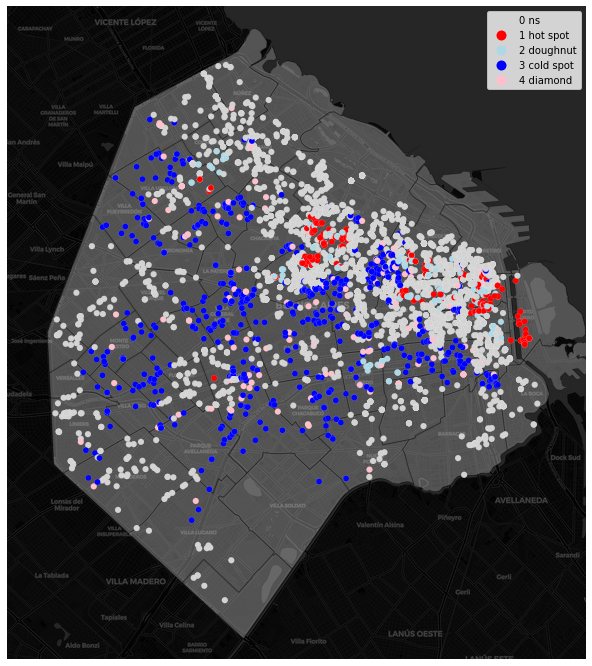

In [ ]:
moran_quadrants_map(geodataframe = geo_data, variable = 'precioUSD', matriz_pesos = w)

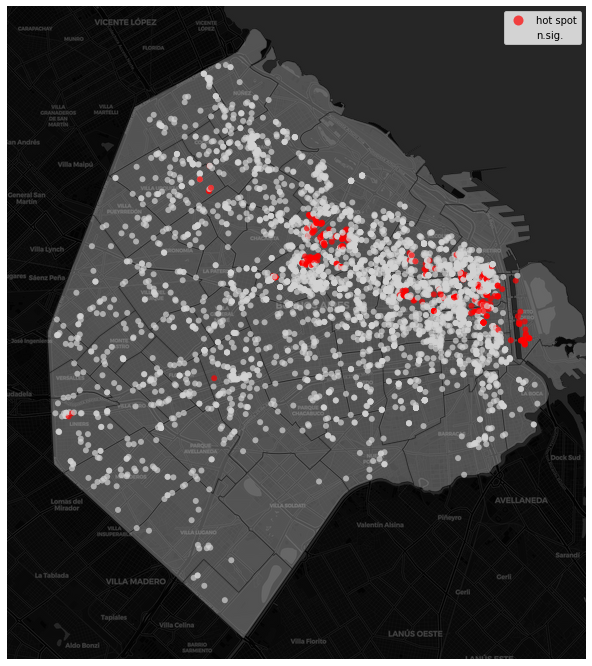

In [ ]:
moran_spot_map(geodataframe = geo_data, variable = 'precioUSD', matriz_pesos = w, hot = True)

### Profiling

In [ ]:
ProfileReport(data)

TypeError: ignored

In [ ]:
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitud, data.latitud))
gdf

In [ ]:
locations = data[['latitud', 'longitud']]
locationlist = locations.values.tolist()

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
map2 = folium.Map(location=[-34.639300, -58.452683], tiles='CartoDB positron', zoom_start=11)

marker_cluster = MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=data['barrio'][point]).add_to(marker_cluster)
map2

### Corrección de direciones

In [ ]:
coordinates

In [ ]:
if not os.path.isfile("./data/coordinates.csv"):
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

    geolocator = Nominatim(user_agent = 'Diplo')
    reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
    
    coordinates = data[['latitud', 'longitud']].copy()
    coordinates['coordenadas'] = coordinates.latitud.map(str) + ", " + coordinates.longitud.map(str)
    
    coordinates['geocodes'] = coordinates['coordenadas'].apply(reverse)
    
    coordinates.to_csv("./data/coordinates.csv")
else:
    coordinates = pd.read_csv("./data/coordinates.csv")

In [ ]:
coordinates['geocodes'].str.split(",", expand=True)

In [ ]:
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

In [ ]:
 def getaddress(lat, lng, language="es", full_address = True):
        try:
            geolocator = Nominatim(user_agent = 'Diplo')
            reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
            string = str(lat) + ', ' + str(lng)
            location = geolocator.reverse(string, language=language)
            data = location.raw
            data = data['address']
                        
            if full_address:
                # Crear objetos para guardar resultados
                street = house_number = district = postalCode = state = country = countryCode = ""
                # Variables intermedias
                street       = data.get('road')
                house_number = data.get('house_number')
                district     = data.get('suburb')
                postalCode   = data.get('postcode')
                state        = data.get('state')
                country      = data.get('country')
                countryCode  = data.get('country_code').upper()
                address = street +'; '+ house_number +'; '+ district  +'; '+  postalCode  +'; '+  state  +'; '+  country  +'; '+  countryCode
            else:
                # Crear objetos para guardar resultados
                street = house_number = ""
                # Variables intermedias
                street       = data.get('road')
                house_number = data.get('house_number')
                address = street +';'+ house_number
        except:
            address = "Error"
        return str(address)

In [ ]:
getaddress(lat = -34.555678, lng = -58.462734	)

In [ ]:
str(-34.547439) + ', ' + str(-58.452683)

In [ ]:
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

In [ ]:
geolocator = Nominatim(user_agent = 'Diplo')
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
direccion = geolocator.reverse(str(-34.547439) + ', ' + str(-58.452683))

In [ ]:
direccion_2 = direccion.raw

In [ ]:
direccion_3 = direccion_2['address']
direccion_3

In [ ]:
direccion_3.get('house_number')